#Exercícios de Física Computacional
##Folha 7
1. O ficheiro folha7-data1.txt tem o registo da intensidade um sinal sonoro em função do tempo. Represente o sinal, calcule a respetiva transformada de Fourier e interprete o resultado.

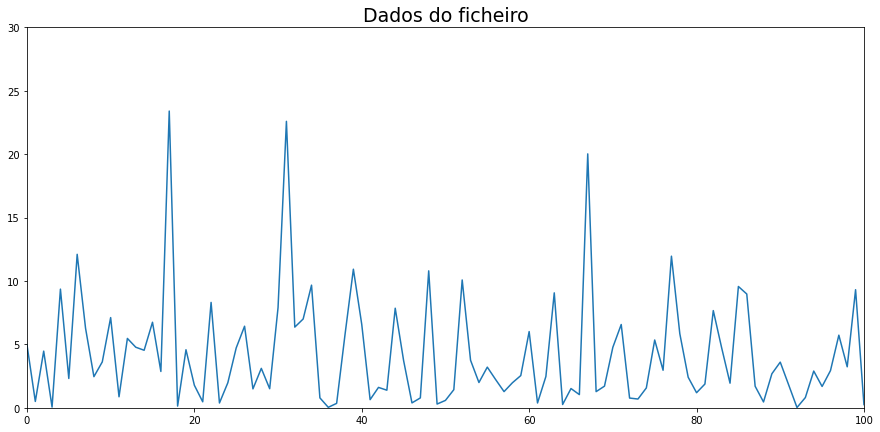

In [ ]:
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import random as rd

data=np.loadtxt('/usr/local/folha7-data1.txt')
t=range(len(data))

plt.figure(figsize=[15,7])
plt.plot(data)
plt.ylim(0,30)
plt.xlim(0,100)
plt.title("Dados do ficheiro",fontsize=19)
plt.show()

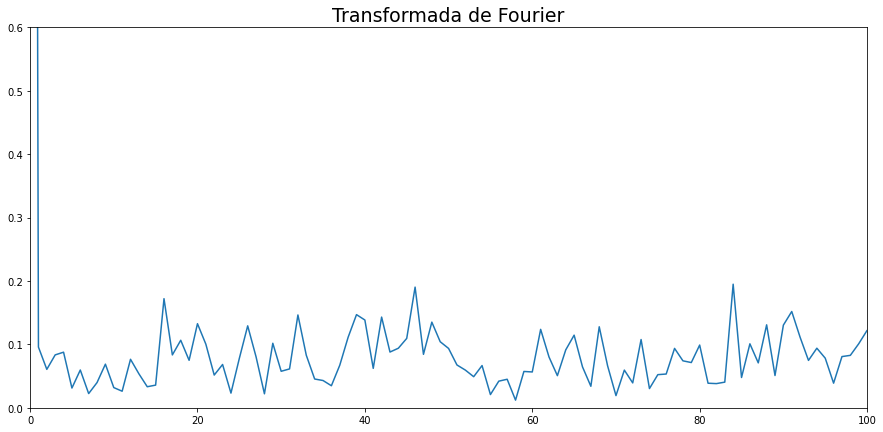

In [ ]:
def dft(y):
    N=len(y)
    c=np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k]+=y[n]*np.exp(-2j*np.pi*k*n/N)
    return c

c=dft(data)
plt.figure(figsize=[15,7])
plt.plot(abs(c)/len(data))
plt.title("Transformada de Fourier",fontsize=19)
plt.ylim(0,0.6)
plt.xlim(0,100)
plt.show()

2. O ficheiro folha7-data2.txt tem o valor de fecho do índice Dow Jones
Industrial Average entre 2006 e 2010.

(a) Leia os dados do ficheiro e represente-os num gráfico.


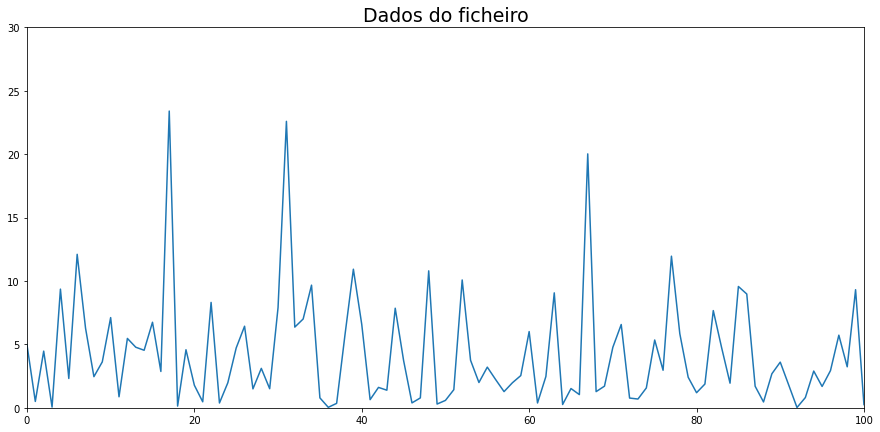

In [ ]:
data2=np.loadtxt("/usr/local/folha7-data2.txt")
plt.figure(figsize=[15,7])
plt.plot(data)
plt.title("Dados do ficheiro",fontsize=19)
plt.ylim(0,30)
plt.xlim(0,100)
plt.show()

(b) Calcule os coeficientes da transformada discreta de Fourier, usando
a função rfft de numpy.fft, que devolve um array com (N + 1)/2
números complexos.

In [ ]:
data2_fft=np.fft.rfft(data2)
print(data2_fft)

[ 1.12839039e+07+0.00000000e+00j  6.84127740e+05-9.55087519e+05j
 -4.19226205e+05+9.29089562e+04j  7.41901498e+04-2.73812250e+05j
 -3.51856811e+04+7.23658613e+04j  1.11482643e+05-3.14779807e+04j
  2.16752824e+04-2.45751549e+04j  1.11224416e+04+2.47975704e+04j
  3.11884665e+04+2.27868210e+04j  7.38523102e+03-3.21233427e+04j
 -3.39615972e+04-1.07833052e+05j -1.23569569e+04+2.73171276e+04j
  2.13837315e+04-9.16684147e+04j -4.32441725e+04+9.92294540e+04j
 -3.55753518e+03-2.54972743e+04j -3.04367677e+04-1.72551151e+04j
 -9.31799610e+03-2.49297658e+04j -9.35033325e+03-1.75612302e+04j
  1.17418062e+04+2.09235370e+04j  4.22549031e+04-2.38143067e+03j
  1.35294835e+04-3.06720066e+04j  4.06499470e+03-2.87140744e+04j
 -1.56146318e+04+2.24811825e+04j  1.35756353e+04-1.28123867e+04j
  1.20484888e+04+3.50866363e+03j -1.55111478e+04-1.70617041e+04j
  8.98307189e+03+4.49546331e+03j  4.42970647e+03+1.59761534e+03j
 -3.00967682e+04-3.74705070e+04j -1.96285643e+03-4.83894355e+03j
  2.97970267e+03-1.915635

(c) Force os últimos 90% dos elementos do array a ser zero e calcule
a transformada de Fourier inversa usando a função irfft. Represente o resultado obtido, sobrepondo-o ao gráfico anterior.

Text(0.5, 1.0, 'Aproximação por FFT com 90% dos coeficientes')

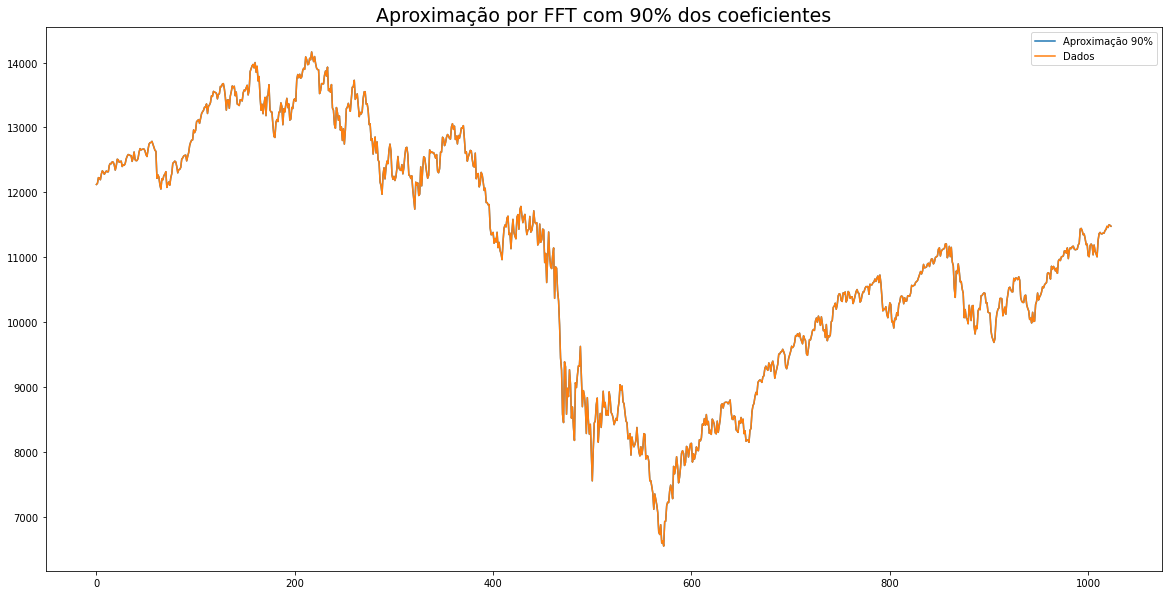

In [ ]:
data22_fft=np.fft.rfft(data2)
data22_fft[int(0.9*len(data2)):]=0.0
plt.figure(figsize=[20,10])
plt.plot(np.fft.irfft(data22_fft),label="Aproximação 90%")
plt.plot(data2,label="Dados")
plt.legend()
plt.title("Aproximação por FFT com 90% dos coeficientes", fontsize=19)

(d) Repita o exercício anterior, mas desta vez usando apenas os primeiros 2% dos coeficientes da transformada de Fourier.

Text(0.5, 1.0, 'Aproximação por FFT com 2% dos coeficientes')

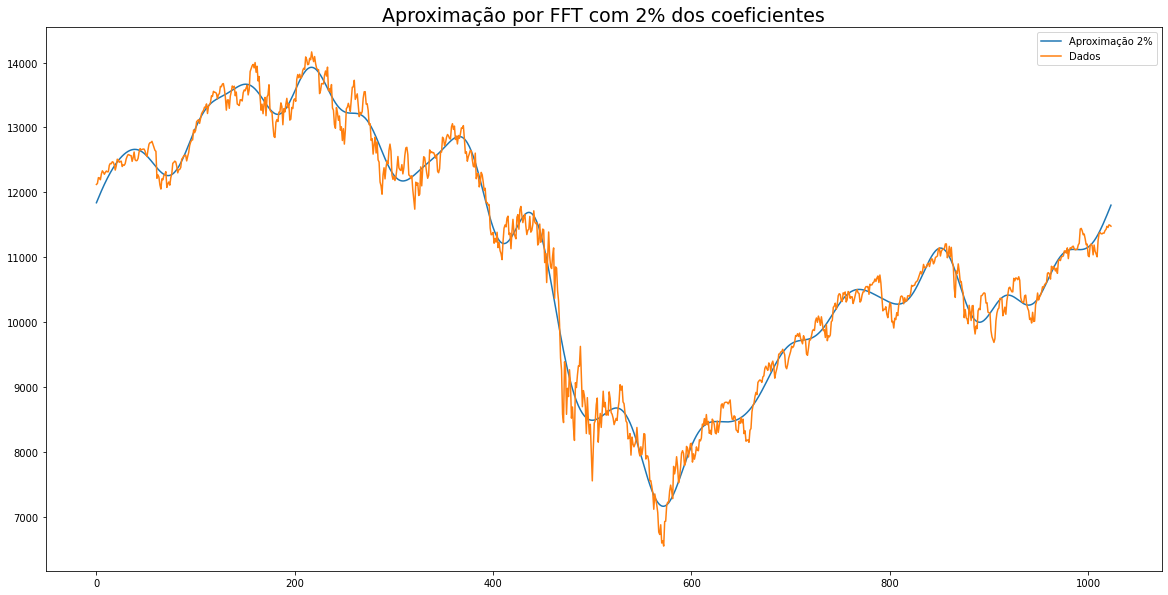

In [ ]:
data22_fft=np.fft.rfft(data2)
data22_fft[int(0.02*len(data2)):]=0.0
plt.figure(figsize=[20,10])
plt.plot(np.fft.irfft(data22_fft),label="Aproximação 2%")
plt.plot(data2,label="Dados")
plt.legend()
plt.title("Aproximação por FFT com 2% dos coeficientes", fontsize=19)

3. O ficheiro folha7-data3.txt contem o número de erupções solares registadas em cada mês desde janeiro de 1749.

(a) Represente o número de erupções solares em função do tempo e estime a duração em meses do ciclo observado.

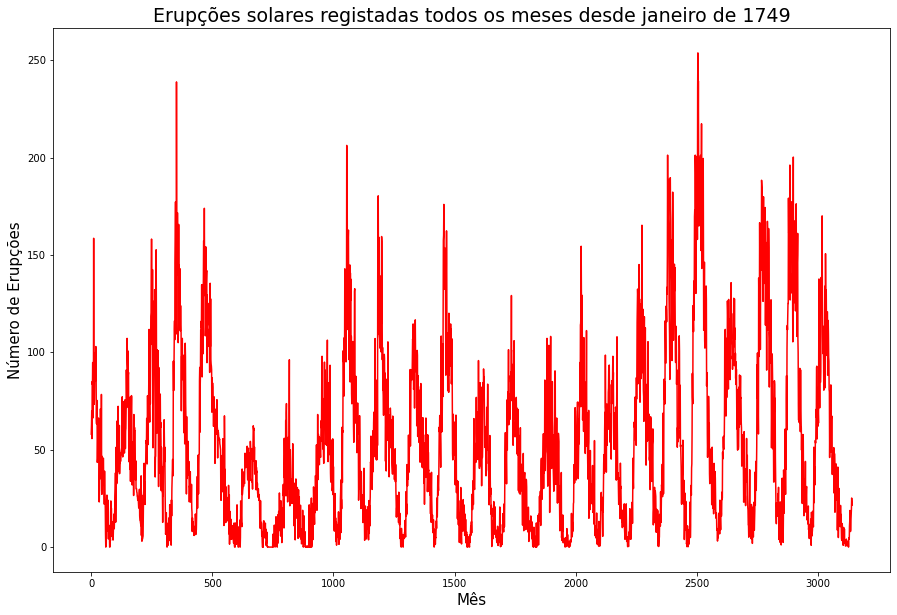

In [ ]:
data3=np.loadtxt('/usr/local/folha7-data3.txt')
mes=[]
erup=[]
for i in range(0,len(data3)):
    mes.append(data3[i][0])
    erup.append(data3[i][1])

plt.figure(figsize=(15,10))
plt.plot(mes,erup,'r')
plt.xlabel('Mês',fontsize=15)
plt.ylabel('Número de Erupções',fontsize=15)
plt.title('Erupções solares registadas todos os meses desde janeiro de 1749', fontsize=19)
plt.show()

(b) Calcule a transformada de Fourier correspondente a estes dados e
represente o quadrado dos coeficientes de Fourier, |ck|
2 em função de
k, obtendo assim o espectro de potência do sinal.

(c) No gráfico de |ck|
2 em função de k identifique o pico mais importante
(excluindo k = 0)

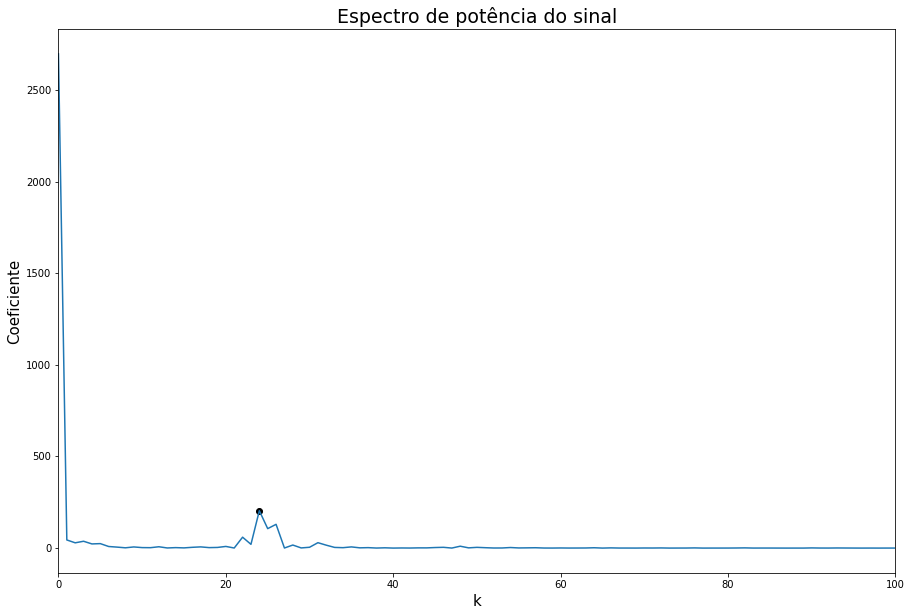

In [ ]:
fft_erup=np.fft.rfft(erup)
x_max1=0
x_max2=0
for i in range(20,40):
    x=(abs(fft_erup[i])/len(erup))**2
    if x>=x_max1:
        x_max1=x
        p1=i

plt.figure(figsize=(15,10))  
plt.plot((abs(fft_erup)/len(erup))**2)
plt.scatter(p1,x_max1,c='k',label='k_máx = '+str(p1)+'\nmáximo = '+str(x_max1))
plt.title('Espectro de potência do sinal', fontsize=19)
plt.xlabel('k', fontsize=15)
plt.ylabel('Coeficiente', fontsize=15)
plt.xlim(0,100)
plt.show()